<a href="https://colab.research.google.com/github/preetikumari5/Machine-Learning/blob/main/KNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Euclidean distance**

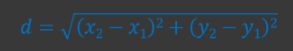

**Manhattan Distance**

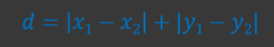

In [1]:
import numpy as np
import statistics

K-nearest Neighbours Classifier

In [19]:
class KNN_Classifier():

  # initiating the parameters
  def __init__(self, distance_metric):

    self.distance_metric = distance_metric

  # getting the distance metric
  def get_distance_metric(self,training_data_point, test_data_point):

    if (self.distance_metric == 'euclidean'):

      dist = 0
      for i in range(len(training_data_point) - 1):
        dist = dist + (training_data_point[i] - test_data_point[i])**2

      euclidean_dist = np.sqrt(dist)

      return euclidean_dist

    elif (self.distance_metric == 'manhattan'):

      dist = 0

      for i in range(len(training_data_point) - 1):
        dist = dist + abs(training_data_point[i] - test_data_point[i])

      manhattan_dist = dist

      return manhattan_dist

  # getting the nearest neighbors
  def nearest_neighbors(self,X_train, test_data, k):

    distance_list = []

    for training_data in X_train:

      distance = self.get_distance_metric(training_data, test_data)
      distance_list.append((training_data, distance))

    distance_list.sort(key=lambda x: x[1])

    neighbors_list = []

    for j in range(k):
      neighbors_list.append(distance_list[j][0])

    return neighbors_list


  # predict the class of the new data point:
  def predict(self,X_train, test_data, k):
    neighbors = self.nearest_neighbors(X_train, test_data, k)

    for data in neighbors:
      label = []
      label.append(data[-1])

    predicted_class = statistics.mode(label)

    return predicted_class


Diabetes Prediction

In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
diabetes_dataset = pd.read_csv("/content/diabetes.csv")

In [6]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
diabetes_dataset.shape

(768, 9)

In [8]:
X = diabetes_dataset.drop(columns='Outcome',axis=1)
Y = diabetes_dataset['Outcome']

In [9]:
X = X.to_numpy()
Y = Y.to_numpy()

In [10]:
print(X)
print(Y)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0

In [11]:
X_train , X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [12]:
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


In [13]:
print(X_train)

[[0.00e+00 1.19e+02 0.00e+00 ... 3.24e+01 1.41e-01 2.40e+01]
 [6.00e+00 1.05e+02 7.00e+01 ... 3.08e+01 1.22e-01 3.70e+01]
 [1.00e+00 1.89e+02 6.00e+01 ... 3.01e+01 3.98e-01 5.90e+01]
 ...
 [1.10e+01 8.50e+01 7.40e+01 ... 3.01e+01 3.00e-01 3.50e+01]
 [4.00e+00 1.12e+02 7.80e+01 ... 3.94e+01 2.36e-01 3.80e+01]
 [0.00e+00 8.60e+01 6.80e+01 ... 3.58e+01 2.38e-01 2.50e+01]]


In [14]:
X_train = np.insert(X_train,8,Y_train,axis=1)

In [15]:
print(X_train)

[[0.00e+00 1.19e+02 0.00e+00 ... 1.41e-01 2.40e+01 1.00e+00]
 [6.00e+00 1.05e+02 7.00e+01 ... 1.22e-01 3.70e+01 0.00e+00]
 [1.00e+00 1.89e+02 6.00e+01 ... 3.98e-01 5.90e+01 1.00e+00]
 ...
 [1.10e+01 8.50e+01 7.40e+01 ... 3.00e-01 3.50e+01 0.00e+00]
 [4.00e+00 1.12e+02 7.80e+01 ... 2.36e-01 3.80e+01 0.00e+00]
 [0.00e+00 8.60e+01 6.80e+01 ... 2.38e-01 2.50e+01 0.00e+00]]


In [16]:
X_train.shape

(614, 9)

In [17]:
print(X_train[:,8])

[1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.
 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0.
 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0.

X_train --> training data with features and target

X_test --> test data without target

Model Training : KNN Classifier

In [21]:
classifier = KNN_Classifier(distance_metric='manhattan')

NOTE: The KNN CLassifier can predict the label for only one data point at a time

In [22]:
prediction = classifier.predict(X_train,X_test[2],k=5)

In [23]:
print(X_test[2])

[  5.    147.     78.      0.      0.     33.7     0.218  65.   ]


In [24]:
print(Y_test[2])

0


In [25]:
print(prediction)

0.0


In [26]:
X_test.shape

(154, 8)

In [28]:
X_test_size = X_test.shape[0]
print(X_test_size)

154


In [29]:
y_pred = []

for i in range(X_test_size):
  prediction = classifier.predict(X_train, X_test[i], k=5)
  y_pred.append(prediction)

In [30]:
print(y_pred)

[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0]


In [31]:
y_true = Y_test

Model Evaluation

In [33]:
accuracy = accuracy_score(y_true,y_pred)

In [35]:
print(accuracy*100)

74.02597402597402
